# Creating and Normalising an SQL Database
The data files are compiled from the website [Retrosheet](retrosheet.org). We will first do some exploratory data analysis to get a feeling for the data. Then we devise a plan to normalise the database.

In [1]:
import pandas as pd
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [2]:
#reading the files into Pandas DataFrames. This may take a while.
game_log = pd.read_csv('game_log.csv')
park_codes = pd.read_csv('park_codes.csv')
person_codes = pd.read_csv('person_codes.csv')
team_codes = pd.read_csv('team_codes.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,13,14,15,19,20,81,82,83,84,85,86,87,88,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
!cat game_log_fields.txt

Field(s)  Meaning
    1     Date in the form "yyyymmdd"
    2     Number of game:
             "0" -- a single game
             "1" -- the first game of a double (or triple) header
                    including seperate admission doubleheaders
             "2" -- the second game of a double (or triple) header
                    including seperate admission doubleheaders
             "3" -- the third game of a triple-header
             "A" -- the first game of a double-header involving 3 teams
             "B" -- the second game of a double-header involving 3 teams
    3     Day of week  ("Sun","Mon","Tue","Wed","Thu","Fri","Sat")
  4-5     Visiting team and league
    6     Visiting team game number
          For this and the home team game number, ties are counted as
          games and suspended games are counted from the starting
          rather than the ending date.
  7-8     Home team and league
    9     Home team game number
10-11     Visiting and home team score (unquoted)


In [4]:
def print_EDA(df):
    """Print first the number of rows and columns of the dataframe.
        Then the first 5 rows and last 5 rows of the dataframe are printed."""
    print('Shape:', df.shape)
    print('First 5 rows:\n', df.head())
    print('Last 5 rows:\n', df.tail())

In [5]:
print_EDA(game_log)

Shape: (171907, 161)
First 5 rows:
        date  number_of_game day_of_week v_name v_league  v_game_number h_name  \
0  18710504               0         Thu    CL1      NaN              1    FW1   
1  18710505               0         Fri    BS1      NaN              1    WS3   
2  18710506               0         Sat    CL1      NaN              2    RC1   
3  18710508               0         Mon    CL1      NaN              3    CH1   
4  18710509               0         Tue    BS1      NaN              2    TRO   

  h_league  h_game_number  v_score  h_score  length_outs day_night completion  \
0      NaN              1        0        2         54.0         D        NaN   
1      NaN              1       20       18         54.0         D        NaN   
2      NaN              1       12        4         54.0         D        NaN   
3      NaN              1       12       14         54.0         D        NaN   
4      NaN              1        9        5         54.0         D      

In [6]:
print_EDA(park_codes)

Shape: (252, 9)
First 5 rows:
   park_id                           name  \
0   ALB01                 Riverside Park   
1   ALT01                  Columbia Park   
2   ANA01       Angel Stadium of Anaheim   
3   ARL01              Arlington Stadium   
4   ARL02  Rangers Ballpark in Arlington   

                                        aka       city state       start  \
0                                       NaN     Albany    NY  09/11/1880   
1                                       NaN    Altoona    PA  04/30/1884   
2             Edison Field; Anaheim Stadium    Anaheim    CA  04/19/1966   
3                                       NaN  Arlington    TX  04/21/1972   
4  The Ballpark in Arlington; Ameriquest Fl  Arlington    TX  04/11/1994   

          end league                                           notes  
0  05/30/1882     NL  TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882  
1  05/31/1884     UA                                             NaN  
2         NaN     AL              

In [7]:
print_EDA(person_codes)

Shape: (20494, 7)
First 5 rows:
          id     last   first player_debut mgr_debut coach_debut ump_debut
0  aardd001  Aardsma   David   04/06/2004       NaN         NaN       NaN
1  aaroh101    Aaron    Hank   04/13/1954       NaN         NaN       NaN
2  aarot101    Aaron  Tommie   04/10/1962       NaN  04/06/1979       NaN
3  aased001     Aase     Don   07/26/1977       NaN         NaN       NaN
4  abada001     Abad    Andy   09/10/2001       NaN         NaN       NaN
Last 5 rows:
              id      last   first player_debut mgr_debut coach_debut ump_debut
20489  zuvep001   Zuvella    Paul   09/04/1982       NaN  04/02/1996       NaN
20490  zuveg101  Zuverink  George   04/21/1951       NaN         NaN       NaN
20491  zwild101  Zwilling   Dutch   08/14/1910       NaN  04/15/1941       NaN
20492  zycht001      Zych    Tony   09/04/2015       NaN         NaN       NaN
20493  thoma102  Thompson     NaN          NaN       NaN         NaN       NaN


In [8]:
print_EDA(team_codes)

Shape: (150, 8)
First 5 rows:
   team_id league  start   end       city         nickname franch_id  seq
0     ALT     UA   1884  1884    Altoona  Mountain Cities       ALT    1
1     ARI     NL   1998     0    Arizona     Diamondbacks       ARI    1
2     BFN     NL   1879  1885    Buffalo           Bisons       BFN    1
3     BFP     PL   1890  1890    Buffalo           Bisons       BFP    1
4     BL1    NaN   1872  1874  Baltimore         Canaries       BL1    1
Last 5 rows:
     team_id league  start   end        city   nickname franch_id  seq
145     WS8     NL   1886  1889  Washington   Senators       WS8    1
146     WS9     AA   1891  1891  Washington   Senators       WS9    1
147     WSN     NL   1892  1899  Washington   Senators       WS9    2
148     WSU     UA   1884  1884  Washington  Nationals       WSU    1
149     MIA     NL   2012     0       Miami    Marlins       FLO    2


## Creating the initial database
First, we use the `sqlite3` library and some helper functions to convert the dataframes to SQL tables. The SQL database is called `mlb.db`. First, we delete the existing file, to make this notebook as reproducible as possible.

In [9]:
!rm mlb.db

In [10]:
import sqlite3

In [11]:
def run_query(query):
    """Return the result of an SQL query as a Pandas DataFrame."""
    with sqlite3.connect('mlb.db') as conn:
        return pd.read_sql_query(query, conn)

In [12]:
def run_command(command):
    """Execute an SQL query; useful for creating tables and adding data."""
    with sqlite3.connect('mlb.db') as conn:
        conn.isolation_level = None
        conn.execute(command)

In [13]:
with sqlite3.connect('mlb.db') as conn:
    team_codes.to_sql('team_codes', conn, index=False)

In [14]:
with sqlite3.connect('mlb.db') as conn:
    game_log.to_sql('game_log', conn, index=False)

In [15]:
with sqlite3.connect('mlb.db') as conn:
    park_codes.to_sql('park_codes', conn, index=False)

In [16]:
with sqlite3.connect('mlb.db') as conn:
    person_codes.to_sql('person_codes', conn, index=False)

In [17]:
q ='''SELECT name, type FROM sqlite_master'''
run_query(q)

,name,type
0,team_codes,table
1,game_log,table
2,park_codes,table
3,person_codes,table


The conversion to SQL tables seems to be ok. The baseball games don't have an unique id yet. And we need one to assign a primary key. So let's see whether we can create a sensible id from the home playing team, the date and the number of the game.

In [18]:
q = '''SELECT h_name || date || number_of_game FROM game_log LIMIT 5'''
run_query(q)

,h_name || date || number_of_game
0,FW1187105040
1,WS3187105050
2,RC1187105060
3,CH1187105080
4,TRO187105090


In [19]:
q = '''
ALTER TABLE game_log
ADD COLUMN game_id TEXT;
'''
run_command(q)

In [20]:
q = '''
UPDATE game_log
SET game_id = h_name || date || number_of_game 
'''
run_command(q)

## Oppurtunities to normalise the data
Note that there is some redundant data in the `game_log` table: most of the name columns could be removed and stored in a seperate table where we keep the person IDs. E.g. for umpire, team manager, winning and losing pitcher this is the case. Starting pitcher is entirely redundant since it can be obtained from the line-up. 

Also, the entire offensive and defensive starting line-up is given in 6 columns: this can be reduced to 3 (player_id, player_def_pos and player_off_pos).

The `park_codes` table contains some redundant data as well: starting date and end date can be obtained from the game info. Similarly, for the debut of a player in `player_codes`.

Finally, note that each row in `game_log` contains the info for both the home and away team. We will create a separate table for the results of each team in a game; so this table contains two rows per game. The game table will then just contain general information about the match.

## Step 1: Tables without foreign keys
We start with creating the table `person`, which is a smaller version of `person_codes`: the debut columns can be obtained from the game information.

The `park` table is a smaller version of `park_codes`: start, end and league columns can be obtained from the game information as well.

The American League and National League are well known, but some of the older leagues are not. We will include therefore the full names of the leagues as well in the `league` table. See [Wikipedia] (https://en.wikipedia.org/wiki/History_of_baseball_in_the_United_States) for more information. 

In a baseball match, people have different roles: offensive/defensive player (2*9= 18 in total), coach, umpires. Also awards like winning pitcher are awarded so we want to store this information as well in an `appearance_type` table. The information is already available in a csv-file. 

### Person table

In [21]:
q = '''
CREATE TABLE IF NOT EXISTS person (
person_id TEXT PRIMARY KEY,
first_name TEXT,
last_name TEXT
);
'''
run_command(q)

In [22]:
q = 'SELECT * FROM person_codes LIMIT 5;'
run_query(q)

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,None,None,None
1,aaroh101,Aaron,Hank,04/13/1954,None,None,None
2,aarot101,Aaron,Tommie,04/10/1962,None,04/06/1979,None
3,aased001,Aase,Don,07/26/1977,None,None,None
4,abada001,Abad,Andy,09/10/2001,None,None,None


In [23]:
q = '''
INSERT OR IGNORE INTO person
SELECT id, first, last FROM person_codes;'''
run_command(q)

In [24]:
q = 'SELECT * FROM person LIMIT 5'
run_query(q)

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


In [25]:
q = '''
SELECT * FROM park_codes LIMIT 5;'''
run_query(q)

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,None,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,04/30/1884,05/31/1884,UA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,None,AL,None
3,ARL01,Arlington Stadium,None,Arlington,TX,04/21/1972,10/03/1993,AL,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,None,AL,None


### Park table

In [26]:
q = '''
CREATE TABLE IF NOT EXISTS park (
    park_id TEXT PRIMARY KEY,
    name TEXT,
    nickname TEXT, 
    city TEXT, 
    state TEXT, 
    notes TEXT
    );'''
run_command(q)

In [27]:
q = '''
INSERT OR IGNORE INTO park
SELECT
    park_id,
    name,
    aka,
    city,
    state,
    notes
FROM park_codes'''
run_command(q)

In [28]:
q = 'SELECT * FROM park LIMIT 5;'
run_query(q)

,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


### League table
We could of course manually insert the league abbreviations and their names, but it is more fun to use Python to do it. Therefore we need to define the function `run_command_many` that executes an SQL query against a list of parameters.


In [29]:
q = '''
CREATE TABLE IF NOT EXISTS league (
    league_id TEXT PRIMARY KEY,
    name TEXT
    );
'''
run_command(q)

In [30]:
q = 'SELECT DISTINCT(v_league) FROM game_log;'
league_ids = run_query(q)

In [31]:
league_names = ['None', 'National League', 'American Association', 
                'Union Association', 'Player\'s League', 
                'American League', 'Federal League']

In [32]:
df_league = pd.concat([league_ids,pd.Series(league_names)],axis = 1)
df_league

,v_league,0
0,None,None
1,NL,National League
2,AA,American Association
3,UA,Union Association
4,PL,Player's League
5,AL,American League
6,FL,Federal League


In [33]:
fills = [df_league.iloc[i,:].tolist() for i in range(df_league.shape[0])]
fills

[[None, 'None'],
 ['NL', 'National League'],
 ['AA', 'American Association'],
 ['UA', 'Union Association'],
 ['PL', "Player's League"],
 ['AL', 'American League'],
 ['FL', 'Federal League']]

In [34]:
def run_command_many(command, values):
    with sqlite3.connect('mlb.db') as conn:
        conn.isolation_level = None
        conn.executemany(command, values)

In [35]:
q = '''
INSERT OR IGNORE INTO league 
VALUES (?, ?);'''
run_command_many(q, fills)

In [36]:
q = 'SELECT * FROM league;'
run_query(q)

,league_id,name
0,None,None
1,NL,National League
2,AA,American Association
3,UA,Union Association
4,PL,Player's League
5,AL,American League
6,FL,Federal League


### Appearance_type table
Using the `DataFrame.to_sql()` method from Pandas is going to give trouble later, because this method doesn't assign a primary key. So we read in the data into a DataFrame and use the `?` placeholder in an SQL query to fill the table with the correct primary key.

In [37]:
q = '''
CREATE TABLE IF NOT EXISTS appearance_type (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT);
'''
run_command(q)

In [38]:
appearance_type = pd.read_csv('appearance_type.csv')
appearance_type.head()

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense


In [39]:
appearance_fill_values = [appearance_type.iloc[i,:].tolist() for i in range(appearance_type.shape[0])]

In [40]:
q = '''
INSERT OR IGNORE INTO appearance_type
VALUES (?,?,?)'''
run_command_many(q, appearance_fill_values)

In [41]:
q = 'SELECT * FROM appearance_type LIMIT 5;'
run_query(q)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense


## Step 2: Game and team tables
The `game` and `team` tables need to exist before we create the tables with information about teams and persons in a match, because they will cross-reference to these tables.

SQLite doesn't enforce foreign key relationships and we would like to ensure the integrity of our data, so we redefine the `run_command()` function to enforce them.

In [42]:
def run_command(c):
    """Execute an SQL query; useful for creating tables and adding data."""
    with sqlite3.connect('mlb.db') as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)

In [43]:
print_EDA(team_codes)

Shape: (150, 8)
First 5 rows:
   team_id league  start   end       city         nickname franch_id  seq
0     ALT     UA   1884  1884    Altoona  Mountain Cities       ALT    1
1     ARI     NL   1998     0    Arizona     Diamondbacks       ARI    1
2     BFN     NL   1879  1885    Buffalo           Bisons       BFN    1
3     BFP     PL   1890  1890    Buffalo           Bisons       BFP    1
4     BL1    NaN   1872  1874  Baltimore         Canaries       BL1    1
Last 5 rows:
     team_id league  start   end        city   nickname franch_id  seq
145     WS8     NL   1886  1889  Washington   Senators       WS8    1
146     WS9     AA   1891  1891  Washington   Senators       WS9    1
147     WSN     NL   1892  1899  Washington   Senators       WS9    2
148     WSU     UA   1884  1884  Washington  Nationals       WSU    1
149     MIA     NL   2012     0       Miami    Marlins       FLO    2


### Team table
The start, end and sequence columns can be derived from the game info so we will drop these columns.

In [44]:
q = '''
CREATE TABLE IF NOT EXISTS team (
    team_id TEXT PRIMARY KEY,
    league_id TEXT,
    city TEXT,
    nickname TEXT,
    franch_id TEXT,
    FOREIGN KEY (league_id) REFERENCES league(league_id)
    );'''
run_command(q)

In [45]:
q = '''
INSERT OR IGNORE INTO team
SELECT
    team_id,
    league,
    city,
    nickname,
    franch_id
FROM team_codes;
    '''
run_command(q)

In [46]:
q = 'SELECT * FROM team LIMIT 5;'
run_query(q)

,team_id,league_id,city,nickname,franch_id
0,ALT,UA,Altoona,Mountain Cities,ALT
1,ARI,NL,Arizona,Diamondbacks,ARI
2,BFN,NL,Buffalo,Bisons,BFN
3,BFP,PL,Buffalo,Bisons,BFP
4,BL1,None,Baltimore,Canaries,BL1


### Game table
As mentioned earlier, all the columns belonging to teams, players, managers and umpires will be stored in separate tables. The `game` table will only contain general information about the match.

In [47]:
q = '''
CREATE TABLE IF NOT EXISTS game (
    game_id TEXT PRIMARY KEY,
    date TEXT,
    number_of_game INTEGER,
    park_id TEXT,
    length_outs NUMERIC,
    day TEXT,
    completion TEXT,
    forfeit TEXT,
    protest TEXT,
    attendance NUMERIC,
    length_minutes NUMERIC,
    additional_info TEXT,
    acquisition_info TEXT,
    FOREIGN KEY (park_id) REFERENCES park(park_id)
    );'''
run_command(q)

In [48]:
q = '''
INSERT OR IGNORE INTO game
SELECT
    game_id,
    date,
    number_of_game,
    park_id,
    length_outs,
    day_night,
    completion,
    forefeit,
    protest,
    attendance,
    length_minutes,
    additional_info,
    acquisition_info
FROM game_log;
    '''
run_command(q)

In [49]:
q = 'SELECT * FROM game LIMIT 5;'
run_query(q)

,game_id,date,number_of_game,park_id,length_outs,day,completion,forfeit,protest,attendance,length_minutes,additional_info,acquisition_info
0,FW1187105040,18710504,0,FOR01,54,D,None,None,None,200,120,None,Y
1,WS3187105050,18710505,0,WAS01,54,D,None,None,None,5000,145,HTBF,Y
2,RC1187105060,18710506,0,RCK01,54,D,None,None,None,1000,140,None,Y
3,CH1187105080,18710508,0,CHI01,54,D,None,None,None,5000,150,None,Y
4,TRO187105090,18710509,0,TRO01,54,D,None,None,None,3250,145,HTBF,Y


## Step 3: team_appearance table
This is a nasty one. Baseball generates a lot of data (*statistics*...) about teams and players, as can be seen from the old `game_log` table. We could copy-paste the information we obtain by quering the schema of `game_log` and then manually delete all the `h_`s, etc. But it is more fun to use regular expressions and let Python solve it.

In [50]:
q = '''SELECT sql FROM sqlite_master
WHERE name = "game_log"
  AND type = "table";'''
schema = run_query(q)
schema

sql
0  CREATE TABLE "game_log" (\n"date" INTEGER,\n  "number_of_game" INTEGER,\n  "day_of_week" TEXT,\n  "v_name" TEXT,\n  "v_league" TEXT,\n  "v_game_number" INTEGER,\n  "h_name" TEXT,\n  "h_league" TEXT,\n  "h_game_number" INTEGER,\n  "v_score" INTEGER,\n  "h_score" INTEGER,\n  "length_outs" REAL,\n  "day_night" TEXT,\n  "completion" TEXT,\n  "forefeit" TEXT,\n  "protest" TEXT,\n  "park_id" TEXT,\n  "attendance" REAL,\n  "length_minutes" REAL,\n  "v_line_score" TEXT,\n  "h_line_score" TEXT,\n  "v_at_bats" REAL,\n  "v_hits" REAL,\n  "v_doubles" REAL,\n  "v_triples" REAL,\n  "v_homeruns" REAL,\n  "v_rbi" REAL,\n  "v_sacrifice_hits" REAL,\n  "v_sacrifice_flies" REAL,\n  "v_hit_by_pitch" REAL,\n  "v_walks" REAL,\n  "v_intentional_walks" REAL,\n  "v_strikeouts" REAL,\n  "v_stolen_bases" REAL,\n  "v_caught_stealing" REAL,\n  "v_grounded_into_double" REAL,\n  "v_first_catcher_interference" REAL,\n  "v_left_on_base" REAL,\n  "v_pitchers_used" REAL,\n  "v_individual_earned_runs" REAL,\n  "v_team_earned_runs" REAL,\n  "v_wild_pitches" REAL,\n  "v_balks" REAL,\n  "v_putouts" REAL,\n  "v_assists" REAL,\n  "v_errors" REAL,\n  "v_passed_balls" REAL,\n  "v_double_plays" REAL,\n  "v_triple_plays" REAL,\n  "h_at_bats" REAL,\n  "h_hits" REAL,\n  "h_doubles" REAL,\n  "h_triples" REAL,\n  "h_homeruns" REAL,\n  "h_rbi" REAL,\n  "h_sacrifice_hits" REAL,\n  "h_sacrifice_flies" REAL,\n  "h_hit_by_pitch" REAL,\n  "h_walks" REAL,\n  "h_intentional_walks" REAL,\n  "h_strikeouts" REAL,\n  "h_stolen_bases" REAL,\n  "h_caught_stealing" REAL,\n  "h_grounded_into_double" REAL,\n  "h_first_catcher_interference" REAL,\n  "h_left_on_base" REAL,\n  "h_pitchers_used" REAL,\n  "h_individual_earned_runs" REAL,\n  "h_team_earned_runs" REAL,\n  "h_wild_pitches" REAL,\n  "h_balks" REAL,\n  "h_putouts" REAL,\n  "h_assists" REAL,\n  "h_errors" REAL,\n  "h_passed_balls" REAL,\n  "h_double_plays" REAL,\n  "h_triple_plays" REAL,\n  "hp_umpire_id" TEXT,\n  "hp_umpire_name" TEXT,\n  "1b_umpire_id" TEXT,\n  "1b_umpire_name" TEXT,\n  "2b_umpire_id" TEXT,\n  "2b_umpire_name" TEXT,\n  "3b_umpire_id" TEXT,\n  "3b_umpire_name" TEXT,\n  "lf_umpire_id" TEXT,\n  "lf_umpire_name" TEXT,\n  "rf_umpire_id" TEXT,\n  "rf_umpire_name" TEXT,\n  "v_manager_id" TEXT,\n  "v_manager_name" TEXT,\n  "h_manager_id" TEXT,\n  "h_manager_name" TEXT,\n  "winning_pitcher_id" TEXT,\n  "winning_pitcher_name" TEXT,\n  "losing_pitcher_id" TEXT,\n  "losing_pitcher_name" TEXT,\n  "saving_pitcher_id" TEXT,\n  "saving_pitcher_name" TEXT,\n  "winning_rbi_batter_id" TEXT,\n  "winning_rbi_batter_id_name" TEXT,\n  "v_starting_pitcher_id" TEXT,\n  "v_starting_pitcher_name" TEXT,\n  "h_starting_pitcher_id" TEXT,\n  "h_starting_pitcher_name" TEXT,\n  "v_player_1_id" TEXT,\n  "v_player_1_name" TEXT,\n  "v_player_1_def_pos" REAL,\n  "v_player_2_id" TEXT,\n  "v_player_2_name" TEXT,\n  "v_player_2_def_pos" REAL,\n  "v_player_3_id" TEXT,\n  "v_player_3_name" TEXT,\n  "v_player_3_def_pos" REAL,\n  "v_player_4_id" TEXT,\n  "v_player_4_name" TEXT,\n  "v_player_4_def_pos" REAL,\n  "v_player_5_id" TEXT,\n  "v_player_5_name" TEXT,\n  "v_player_5_def_pos" REAL,\n  "v_player_6_id" TEXT,\n  "v_player_6_name" TEXT,\n  "v_player_6_def_pos" REAL,\n  "v_player_7_id" TEXT,\n  "v_player_7_name" TEXT,\n  "v_player_7_def_pos" REAL,\n  "v_player_8_id" TEXT,\n  "v_player_8_name" TEXT,\n  "v_player_8_def_pos" REAL,\n  "v_player_9_id" TEXT,\n  "v_player_9_name" TEXT,\n  "v_player_9_def_pos" REAL,\n  "h_player_1_id" TEXT,\n  "h_player_1_name" TEXT,\n  "h_player_1_def_pos" REAL,\n  "h_player_2_id" TEXT,\n  "h_player_2_name" TEXT,\n  "h_player_2_def_pos" REAL,\n  "h_player_3_id" TEXT,\n  "h_player_3_name" TEXT,\n  "h_player_3_def_pos" REAL,\n  "h_player_4_id" TEXT,\n  "h_player_4_name" TEXT,\n  "h_player_4_def_pos" REAL,\n  "h_player_5_id" TEXT,\n  "h_player_5_name" TEXT,\n  "h_player_5_def_pos" REAL,\n  "h_player_6_id" TEXT,\n  "h_player_6_name" TEXT,\n  "h_player_6_def_pos" REAL,\n  "h_player_7_id" TEXT,\n  "h_player_7_name" TEXT,\n  "h_playe

We would like to use all the columns from at_bats until triple_plays. And since we are going to have separate rows for the visiting and home teams, we have to get rid of the `h_` and `v_` prefixes as well. Note: because the line_score columns are alternating between visiting and away team, we will insert these manually, similarly for score.

In [51]:
import re
schema = schema.iloc[0,0]

In [52]:
match_start = re.search(r'\n  "v_at_bats', schema)
start_pos = match_start.start()
match_end = re.search(r'v_triple_plays" REAL,', schema)
end_pos = match_end.end()
print(schema[start_pos:end_pos])


  "v_at_bats" REAL,
  "v_hits" REAL,
  "v_doubles" REAL,
  "v_triples" REAL,
  "v_homeruns" REAL,
  "v_rbi" REAL,
  "v_sacrifice_hits" REAL,
  "v_sacrifice_flies" REAL,
  "v_hit_by_pitch" REAL,
  "v_walks" REAL,
  "v_intentional_walks" REAL,
  "v_strikeouts" REAL,
  "v_stolen_bases" REAL,
  "v_caught_stealing" REAL,
  "v_grounded_into_double" REAL,
  "v_first_catcher_interference" REAL,
  "v_left_on_base" REAL,
  "v_pitchers_used" REAL,
  "v_individual_earned_runs" REAL,
  "v_team_earned_runs" REAL,
  "v_wild_pitches" REAL,
  "v_balks" REAL,
  "v_putouts" REAL,
  "v_assists" REAL,
  "v_errors" REAL,
  "v_passed_balls" REAL,
  "v_double_plays" REAL,
  "v_triple_plays" REAL,


So we have obtained the correct columns of the schema. Next, let's get rid of the quotes and `v_` prefix.

In [53]:
columns = schema[start_pos:end_pos]
columns = re.sub(r"\"", "", columns)
columns = re.sub(r"v_","", columns)
print(columns)


  at_bats REAL,
  hits REAL,
  doubles REAL,
  triples REAL,
  homeruns REAL,
  rbi REAL,
  sacrifice_hits REAL,
  sacrifice_flies REAL,
  hit_by_pitch REAL,
  walks REAL,
  intentional_walks REAL,
  strikeouts REAL,
  stolen_bases REAL,
  caught_stealing REAL,
  grounded_into_double REAL,
  first_catcher_interference REAL,
  left_on_base REAL,
  pitchers_used REAL,
  individual_earned_runs REAL,
  team_earned_runs REAL,
  wild_pitches REAL,
  balks REAL,
  putouts REAL,
  assists REAL,
  errors REAL,
  passed_balls REAL,
  double_plays REAL,
  triple_plays REAL,


In [54]:
q = '''
CREATE TABLE IF NOT EXISTS team_appearance (
    team_id TEXT,
    game_id TEXT,
    home INTEGER,
    league_id TEXT,
    score INTEGER,
    line_score TEXT,''' + columns + '''
    PRIMARY KEY (team_id, game_id),
    FOREIGN KEY (league_id) REFERENCES league(league_id)
    );'''
run_command(q)

Next, we have to add the rows from the `game_log` table. So now have to add the `v_` and `h_` prefixes.

In [55]:
h_columns = re.sub(r"\n  ", r"\n\th_", columns)
h_columns = re.sub(" REAL", "", h_columns)
v_columns = re.sub(r"\n  ", r"\n\tv_", columns)
v_columns = re.sub(" REAL", "", v_columns)

In [56]:
#Since the list of columns ends with a ',', we use a slice to get rid of it.
q = '''
INSERT OR IGNORE INTO team_appearance
    SELECT
        h_name,
        game_id,
        1 AS home,
        h_league,
        h_score,
        h_line_score, ''' + h_columns[:-1] + '''
    FROM game_log
UNION
    SELECT
        v_name,
        game_id,
        0 AS home,
        v_league,
        v_score,
        v_line_score, ''' + v_columns[:-1] + '''
    FROM game_log;
'''
run_command(q)

In [57]:
q = 'SELECT * FROM team_appearance WHERE league_id IS NULL LIMIT 5;'
run_query(q)

,team_id,game_id,home,league_id,score,line_score,at_bats,hits,doubles,triples,homeruns,rbi,sacrifice_hits,sacrifice_flies,hit_by_pitch,walks,intentional_walks,strikeouts,stolen_bases,caught_stealing,grounded_into_double,first_catcher_interference,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_plays,triple_plays
0,BL1,BL1187204220,1,None,14,211033103,49.0,18.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,None,1.0,0.0,0.0,0.0,None,8.0,1.0,3.0,0.0,0.0,0.0,27.0,8.0,8.0,0.0,2.0,0.0
1,BL1,BL1187204250,1,None,11,01300230002,55.0,21.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,None,0.0,0.0,0.0,0.0,None,12.0,2.0,6.0,0.0,3.0,0.0,33.0,16.0,8.0,1.0,0.0,0.0
2,BL1,BL1187204270,1,None,22,053017312,56.0,17.0,NaN,-1.0,2.0,15.0,0.0,0.0,0.0,0.0,None,0.0,NaN,-1.0,0.0,None,7.0,1.0,1.0,0.0,0.0,0.0,27.0,8.0,8.0,3.0,NaN,0.0
3,BL1,BL1187205020,1,None,4,001200001,38.0,9.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,None,2.0,0.0,0.0,0.0,None,5.0,1.0,2.0,0.0,NaN,0.0,27.0,6.0,6.0,0.0,0.0,0.0
4,BL1,BL1187205070,1,None,22,612323401,56.0,19.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,None,0.0,NaN,-1.0,0.0,None,7.0,1.0,3.0,0.0,1.0,0.0,27.0,9.0,6.0,2.0,1.0,0.0


Hurray, it worked! Let's move on to the final table: person_appearance.

## Step 4: person_appearance table
This one is also quite some work, but mostly manual. The umpire rows could be inserted with some string formatting, but I choose to do them manually. The defensive and offensive positions, $2*9 = 18$ in total, are of course more efficient processed by writing a for loop and using string formatting.

In [58]:
q = '''
CREATE TABLE IF NOT EXISTS person_appearance (
    appearance_id INTEGER PRIMARY KEY,
    person_id TEXT,
    team_id TEXT,
    game_id TEXT,
    appearance_type_id TEXT,
    FOREIGN KEY (person_id) REFERENCES person(person_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (appearance_type_id) REFERENCES appearance_type(appearance_type_id)
    );'''
run_command(q)

In [59]:
q = '''
INSERT OR IGNORE INTO person_appearance(
    game_id,
    team_id,
    person_id,
    appearance_type_id
)
    SELECT
        game_id,
        NULL,
        hp_umpire_id,
        "UHP"
    FROM game_log
    WHERE hp_umpire_id IS NOT NULL
UNION
    SELECT
        game_id,
        NULL,
        [1b_umpire_id],
        "U1B"
    FROM game_log
    WHERE [1b_umpire_id] IS NOT NULL

UNION
    SELECT
        game_id,
        NULL,
        [2b_umpire_id],
        "U2B"
    FROM game_log
    WHERE [2b_umpire_id] IS NOT NULL

UNION
    SELECT
        game_id,
        NULL,
        [3b_umpire_id],
        "U3B"
    FROM game_log
    WHERE [3b_umpire_id] IS NOT NULL

UNION
    SELECT
        game_id,
        NULL,
        lf_umpire_id,
        "ULF"
    FROM game_log
    WHERE lf_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        rf_umpire_id,
        "URF"
    FROM game_log
    WHERE rf_umpire_id IS NOT NULL
    
UNION

    SELECT
        game_id,
        v_name,
        v_manager_id,
        "MM"
    FROM game_log
    WHERE v_manager_id IS NOT NULL

UNION
    SELECT
        game_id,
        h_name,
        h_manager_id,
        "MM"
    FROM game_log
    WHERE h_manager_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_pitcher_id,
        "AWP"
    FROM game_log
    WHERE winning_pitcher_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN v_name
            ELSE h_name
            END,
        losing_pitcher_id,
        "ALP"
    FROM game_log
    WHERE losing_pitcher_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        saving_pitcher_id,
        "ASP"
    FROM game_log
    WHERE saving_pitcher_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_rbi_batter_id,
        "AWB"
    FROM game_log
    WHERE winning_rbi_batter_id IS NOT NULL;
'''
run_command(q)

In [60]:
template = '''
INSERT OR IGNORE INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
) 
    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "O{num}"
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL

UNION

    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "D" || CAST({hv}_player_{num}_def_pos AS INT)
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL;
'''
for hv in ["h","v"]:
    for num in range(1,10):
        query_vars = {
            "hv": hv,
            "num": num
        }
        run_command(template.format(**query_vars))

In [61]:
q = 'SELECT * FROM person_appearance WHERE appearance_type_id = "O1" LIMIT 5;'
run_query(q)

,appearance_id,person_id,team_id,game_id,appearance_type_id
0,1302394,erstd001,ANA,ANA200004030,O1
1,1302396,erstd001,ANA,ANA200004040,O1
2,1302398,erstd001,ANA,ANA200004050,O1
3,1302400,erstd001,ANA,ANA200004070,O1
4,1302402,erstd001,ANA,ANA200004080,O1


We finished the last table of our database! Note that the database is pretty big. And we can now delete the original tables we obtained from the csv-files.

In [62]:
q = 'DROP TABLE game_log;'
run_command(q)

In [63]:
q = 'DROP TABLE team_codes;'
run_command(q)

In [64]:
q = 'DROP TABLE person_codes;'
run_command(q)

In [65]:
q = 'DROP TABLE park_codes;'
run_command(q)

In [66]:
!ls -lh

total 1151048
-rw-r--r--  1 Matthijs  staff   268B Jan 30 14:31 README.md
-rwxr-xr-x@ 1 Matthijs  staff   168K Jan 31 16:39 analysis.ipynb
-rwxr-xr-x@ 1 Matthijs  staff   717B Jan 20 11:12 appearance_type.csv
-rwxr-xr-x@ 1 Matthijs  staff   126M Jan 20 11:12 game_log.csv
-rwxr-xr-x@ 1 Matthijs  staff   6.4K Jan 20 11:12 game_log_fields.txt
-rw-r--r--  1 Matthijs  staff   424M Jan 31 16:41 mlb.db
-rw-r--r--@ 1 Matthijs  staff   461K Jan 30 20:31 mlb_schema.svg
-rwxr-xr-x@ 1 Matthijs  staff    20K Jan 20 11:12 park_codes.csv
-rwxr-xr-x@ 1 Matthijs  staff   823K Jan 20 11:12 person_codes.csv
-rwxr-xr-x@ 1 Matthijs  staff   6.0K Jan 20 11:12 team_codes.csv


# Data Analysis
Since we have normalised our database, we can now use it for some data analysis. First, let's see how we can obtain the debut of a player (or manager for that matter) from our database. Note that we deleted these columns from the original tables, so we should now write a query to do that.

In [67]:
q = '''
SELECT 
    pa.person_id,
    p.first_name || ' ' || p.last_name name,
    MIN(g.date)
FROM person_appearance pa
INNER JOIN game g on g.game_id = pa.game_id
INNER JOIN person p on p.person_id = pa.person_id
GROUP BY pa.person_id
LIMIT 10;
'''
run_query(q)

,person_id,name,MIN(g.date)
0,aardd001,David Aardsma,20040406
1,aaroh101,Hank Aaron,19540413
2,aarot101,Tommie Aaron,19620423
3,aased001,Don Aase,19800413
4,abada001,Andy Abad,20030910
5,abadf001,Fernando Abad,20100910
6,abbae101,Ed Abbaticchio,19100705
7,abbec101,Charlie Abbey,18970721
8,abbof101,Fred Abbott,19050909
9,abbog001,Glenn Abbott,19800414


## Distribution of debut months
It would be interesting to see the distribution of the debut month. We can use the `LIKE` operator to do this. But first we create a view based on the query above. Because we need to use the query above quite a lot (12 times) and it gets pretty time consuming to have it calculated every time again.

In [68]:
q = '''
CREATE VIEW debut_all AS
    SELECT 
        pa.person_id,
        p.first_name || ' ' || p.last_name name,
        MIN(g.date) debut_date,
        pa.appearance_type_id
    FROM person_appearance pa
    INNER JOIN game g on g.game_id = pa.game_id
    INNER JOIN person p on p.person_id = pa.person_id
    GROUP BY pa.person_id;
'''
run_command(q)

In [69]:
only_players = appearance_type['appearance_type_id'][:18].tolist()
values = ', '.join("'" + pos + "'" for pos in only_players)
q = '''
CREATE VIEW debut_player AS
SELECT * 
FROM debut_all 
WHERE appearance_type_id IN (%s);
''' %values
run_command(q)

In [70]:
months = range(1,13)
months_count = [0] * len(months)

for i, month in enumerate(months):
    q = '''
    SELECT COUNT(*)
    FROM debut_player
    WHERE debut_date LIKE '____%s__';
    '''%str(month).zfill(2)
    months_count[i] = run_query(q).iloc[0,0]

print(months_count)

[0, 0, 18, 2240, 1054, 698, 681, 665, 1946, 233, 0, 0]


In [71]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

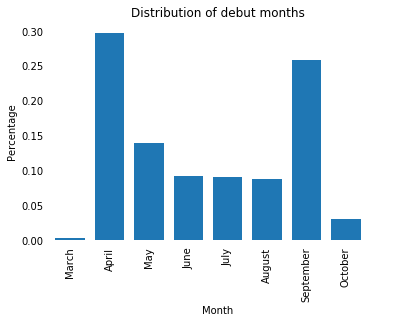

In [72]:
months_perc = months_count/sum(months_count)
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

positions = np.arange(len(months_perc))

fig, ax = plt.subplots()
ax.bar(x=positions, height=months_perc, width=.75)
ax.tick_params(bottom=False, top=False, left=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlim(1.5,10)
ax.set_xticklabels(months[1:10], rotation=90)
ax.set_xlabel('Month')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of debut months')
plt.show()

Not surprisingly we see that most debuts are in April, that's when the baseball season starts. There are also quite a lot of debuts in September. I can't really think of a good explanation for that one, except that managers perhaps want to give some rest to their star players with the upcoming post season in mind.

## Homerun analysis
Homeruns are not that common in a baseball match, so it would be interesting to see whether some stadiums have an exceptional amount of homeruns per game (both positive and negative). Another interesting feature would be to see the distribution of homeruns in time: do players hit more homeruns than in the beginnen of baseball?

Note that in our analysis we have to be careful when querying the data. Because we have separate results for the home playing and visiting team we should divide the total amount of homeruns not by the total number of rows, but by half of the amount of rows. Mathematically speaking we can calculate with `AVG()` the value
$$\bar{x}_{2N} = \frac{x_1 + y_1 + x_2 + y_2 + \ldots + x_N + y_N}{2*N},$$
where $x_i, y_i$ are the number of homeruns for the home team and away team respectively and $2*N$ is the number of rows. Thus $x_i + y_i$ is the number of homeruns per game.
So we would like to have
$$\bar{x}_{N} = \frac{(x_1 + y_1) + (x_2 + y_2) + \ldots + x_N + y_N}{N}.$$
Luckily, we readily see that $\bar{x}_{N} = 2 * \bar{x}_{2N}$.

### Homeruns per stadium

In [73]:
q = '''
SELECT 
    park.name,
    AVG(ta.homeruns)*2 avg_homeruns,
    COUNT(*)/2 num_games
FROM game g
INNER JOIN team_appearance ta ON ta.game_id = g.game_id
INNER JOIN park ON park.park_id = g.park_id
GROUP BY park.park_id
ORDER BY 2 DESC
LIMIT 10;'''
run_query(q)

,name,avg_homeruns,num_games
0,Madison Avenue Grounds,5.000000,1
1,Wrigley Field,3.024390,82
2,Yankee Stadium II,2.626543,648
3,Tokyo Dome,2.625000,8
4,Great American Ballpark,2.562610,1134
5,U.S. Cellular Field,2.536232,1380
6,Coors Field,2.503628,1378
7,Rangers Ballpark in Arlington,2.485859,1379
8,Oriole Park at Camden Yards,2.423469,1372
9,Los Angeles Memorial Coliseum,2.404531,309


In [74]:
q = '''
SELECT 
    park.name,
    AVG(ta.homeruns) * 2 avg_homeruns,
    COUNT(*)/2 num_games
FROM game g
INNER JOIN team_appearance ta ON ta.game_id = g.game_id
INNER JOIN park ON park.park_id = g.park_id
GROUP BY park.park_id
ORDER BY 2 ASC
LIMIT 10;'''
run_query(q)

,name,avg_homeruns,num_games
0,Riverside Park,None,7
1,Columbia Park,None,18
2,Oriole Park I,None,352
3,Belair Lot,None,50
4,Monumental Park,None,1
5,Oriole Park II,None,103
6,Oriole Park III,None,616
7,Oriole Park IV,None,130
8,Dartmouth Grounds,None,57
9,South End Grounds II,None,420


From the last query we see that there quite some stadiums with no homeruns at all. This could be of course really the case or there is some missing data for these stadiums. Another possibility is that these stadiums were used in a period of time when homeruns were very rare.

Looking at the results for the stadiums with highest average amount of homeruns, we see that Wrigley Field has the highest average score of approximately 3 homerun per game (disregarding Madison Avenue Grounds because it has only one game in the database). The next highest scoring stadiums are within the same range: approximately 2.5 to 2.6 homeruns per game on average.

### Homeruns over time
We can obtain the average number of homeruns per decade from the database. Once again, we have to be careful and multiply the value calculated by `AVG()` with 2.

In [75]:
decades = range(187,202)
avg_homeruns = {}
for dec in decades:
    q = '''
    SELECT 
        AVG(ta.homeruns)*2 avg_homeruns
    FROM game g
    INNER JOIN team_appearance ta ON ta.game_id = g.game_id
    INNER JOIN park ON park.park_id = g.park_id
    WHERE g.game_id LIKE '%{0:s}%'
    '''
    avg_homeruns[str(dec) + '0s'] = run_query(q.format(str(dec))).loc[0,'avg_homeruns']

df_homeruns = pd.DataFrame.from_dict(avg_homeruns, orient='index', columns=['avg_homeruns'])


Text(0.5,1,'Distribution of average homeruns over time')

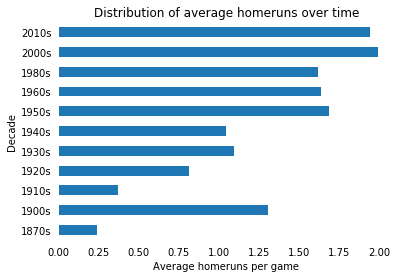

In [76]:
ax = df_homeruns['avg_homeruns'].dropna().plot.barh()
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel('Average homeruns per game')
ax.set_ylabel('Decade')
ax.set_title('Distribution of average homeruns over time')

First of all, note that there is quite some data missing: from the 1880s, 1890s, 1970s and 1990s.
We can also see that there is a moderate increase in homeruns over time. Interestingly, there were quite a lot of homeruns in the 1900s: that could be part of another investigation.

## Number of teams per player
In football - that is, real football as it is played and called in Europe, not American ;) - players switch quite frequently from teams. Let's see what the data say about this in baseball.

In [77]:
q = '''
SELECT
    p.first_name || ' ' || p.last_name name,
    COUNT(DISTINCT(pa.team_id)) num_teams
FROM person_appearance pa 
INNER JOIN person p ON p.person_id = pa.person_id
GROUP BY pa.person_id
ORDER BY num_teams DESC;
'''
df_num_teams = run_query(q)

In [78]:
df_num_teams.head()

,name,num_teams
0,LaTroy Hawkins,11
1,Edwin Jackson,11
2,Matt Stairs,11
3,Rick White,11
4,Russell Branyan,10


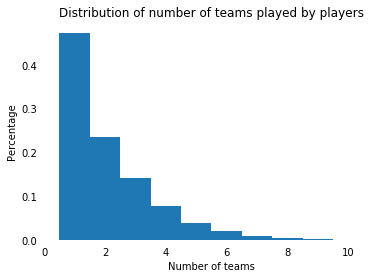

In [79]:
bins = np.arange(0,11)+.5
ax = df_num_teams['num_teams'].plot.hist(bins=bins, density=True)
ax.set_title("Distribution of number of teams played by players")
ax.set_xlabel("Number of teams")
ax.set_ylabel("Percentage")
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

We see that almost 50% of the players played for only one team. In fact the distribution seems to follow a nice power law with a couple of extremes: 4 players who played for 11 different teams!